# R tutorial: Introduction to R
### Summer School in Statistics for Astronomers
### Instructor: Eric Feigelson (Penn State)

R is a powerful software environment for data analysis, graphics, and especially statistical analysis. It is available free to the public at www.r-project.org with easily installed binaries for Linux, MacOS and Windows.  This notebook provides an introduction to R designed for students and researchers in astronomy.  Some familiarity with scripting languages like Matlab or IDL is helpful.

To use Jupyter notebooks, both Python and R need to be installed on your computer.  Python's *anaconda* distribution and *conda* package management system automatically include Jupyter Notebooks as an application accessed through the *Anaconda Navigator*.  

However, it is possible that your Anaconda release did not automatically include the R kernel for Jupyter.  You can tell whether it is present if the R logo (blue R in front of gray ellipse) is shown at the top-right of the Jupyter page.  If it is missing, then the code cells below will fail upon execution. To install the R kernel within Python, type:

    conda install -c r r-irkernel 

Alternatively, you can make R available to Jupyter from an R console by typing:

    install.packages('IRkernel')  ;  IRkernel::installspec() 

For further discussion of the relationship between Python, R, Jupyter and other notebook environments, see https://www.datacamp.com/community/blog/jupyter-notebook-r

---

Some basic information:
- R is driven by the command line in the R console.  Double-click the R icon or (in Linux) type 'R' in the terminal to open the console. 
- R has >100,000 'functions' that perform various tasks. Each function uses () brackets to list arguments and parameters.  
- Every function has a 'help(fn)' page telling how it is used, what operation is run, and what output it produces with references an examples that can be cut-and-paste into an R console. It is essential for both novice and experienced R programmers to read help files.
- A hash mark ( # ) denotes comments in an R script.  A semi-colon ( ; ) has the same action as a carriage return. Lines do not need to end with a semi-colon.
- The commands in the Summer School tutorials can be run interactively in Jupyter, or cut-and-pasted into a separate R console.

In [1]:
# I.  Set up your session

getwd()                     # find working directory.  
setwd("C:/Users/Time27.B1729/OneDrive/Documents")
getwd()                     # see the working directory has changed
citation()                  # quote this citation in any publication using R

[1] "C:/Users/Time27.B1729/OneDrive/Desktop"

[1] "C:/Users/Time27.B1729/OneDrive/Documents"

To cite R in publications use:

  R Core Team (2024). _R: A Language and Environment for Statistical
  Computing_. R Foundation for Statistical Computing, Vienna, Austria.
  <https://www.R-project.org/>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2024},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also 'citation("pkgname")' for
citing R packages.

In [2]:
sessionInfo()               # learn about your software environment

R version 4.4.1 (2024-06-14 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 22635)

Matrix products: default


locale:
[1] LC_COLLATE=English_India.utf8  LC_CTYPE=English_India.utf8   
[3] LC_MONETARY=English_India.utf8 LC_NUMERIC=C                  
[5] LC_TIME=English_India.utf8    

time zone: Asia/Calcutta
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     base64enc_0.1-3   fastmap_1.2.0    
 [5] glue_1.8.0        htmltools_0.5.8.1 repr_1.1.7        lifecycle_1.0.4  
 [9] cli_3.6.5         vctrs_0.6.5       pbdZMQ_0.3-14     compiler_4.4.1   
[13] tools_4.4.1       evaluate_1.0.3    pillar_1.10.2     rlang_1.1.6      
[17] jsonlite_2.0.0    crayon_1.5.3      IRkernel_1.3.2    uuid_1.2-1       

In [3]:
library()                   # see packages installed on your computer
                            # ~30 are installed automatically with R

In [4]:
# II. Create and characterize a vector

a <- c(33, 44, 92, 58)      # combine numbers into a vector
length(a)
ls()                        # list names of objects in your environment
class(a)                    # state the `class' of an R object (described in III below)
str(a)                      # state the structure of an R object
a                           # state the contents of an R object

[1] 4

[1] "a"

[1] "numeric"

 num [1:4] 33 44 92 58


[1] 33 44 92 58

In [ ]:
# R vectors and arrays start at index 1, 
# unlike Python where the first element has index 0

In [6]:
write(file='output', a)     # write an ASCII file into the working directory
save(file='output_bin', a)  # write a binary file
#Save(file='output_bin', a)  # error because 'Save' is not a known function.
                            # R syntax is case sensitive.

In [7]:
sum(a)

# Annotated write to console. The \n symbol is a carriage return.
cat('Sum of ', length(a), ' elements in the vector a = ', sum(a), '\n')
summary(a)                  # many R objects have a built-in 'summary' function

[1] 227

Sum of  4  elements in the vector a =  227 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   41.25   51.00   56.75   66.50   92.00 

In [8]:
# Manipulation of vector indices

a[1:4]          # show all four elements of the vector
a[3]            # note that R vectors start with index 1 not 0, unlike Python
a > 40          # logical operation
sum(a[a>40])    # note the self-referential use of vector/array indices here
which.max(a)    # R has many built-in functions for vectors and arrays
match(44, a)    # find the index of the element equal to 44

[1] 33 44 92 58

[1] 92

[1] FALSE  TRUE  TRUE  TRUE

[1] 194

[1] 3

[1] 2

### R classes

R objects are placed into **classes**: numeric, character, logical, vector, matrix, factor, data.frame, list, and dozens of others designed by advanced R functions and CRAN packages. *plot, print, summary* functions are adapted to class objects; see e.g. methods(summary).  

Two particularly important classes are the 'data frame' used for tabular data and the 'list' used as a bucket with heterogeneous content.  The data frame is a 2-dimensional array with associated column names. The list class allows a hierarchical structure of R objects such as scalars, vectors, arrays, and attributes.  Here we make a hierarchical list, use 'str' (structure) to show its contents, and access an element of the list using the $ delimiter. 

In [9]:
# III.  R classes and packages

# Make and write a data.frame, a 2D array with column names

d <- data.frame(cbind(seq(1:4), a, a^3))  # Bind columns into data frame
names(d) <- c('ID', 'a', 'a_cubed') # Column names for data frame                                         
d2 <- d[-4,-1]                            # Remove 4th row and 1st column
d ; d2
write.table(d, file='d.txt', quote=FALSE, row.names=FALSE)

ID,a,a_cubed
<dbl>,<dbl>,<dbl>
1,33,35937
2,44,85184
3,92,778688
4,58,195112


,a,a_cubed
,<dbl>,<dbl>
1,33,35937
2,44,85184
3,92,778688


In [10]:
# Make and show a list.

b_list <- list(star=c('Sirius', 'Procyon'), SpTy=c('O','B','A'), Hubble_km.s=68)
str(b_list)
b_list[['SpTy']] = list(subtype=seq(0.1:0.9, by=0.1))
str(b_list)

# Access named elements of a list with the dollar sign ($)
b_list$SpTy$subtype[1:3]

List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       : chr [1:3] "O" "B" "A"
 $ Hubble_km.s: num 68
List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       :List of 1
  ..$ subtype: num [1:10] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
 $ Hubble_km.s: num 68


[1] 0.1 0.2 0.3

### R packages

The ~20,000 CRAN packages are obtained on-the-fly when they are needed. Several dozen packages are already in the base-R release, and can be used with the *library* or *require* command.  Most packages are on mirror sites hosted by institutions around the world, but are most easily downloaded from the commercial cloud at *https://cloud.r-project.org*. 

There is no useful index of the CRAN packages and their many functions. The collection expanded exponentially during the 2000s and is now growing by sevearal packages every day.  Expert volunteers in ~40 statistical areas update lists of CRAN packages in their area; these are accesses on the Web at [CRAN Task Views](https://cran.r-project.org/web/views/). Task Views of particular interest to astronomers include _Bayesian_, _Cluster_, _HighPerformanceComputing_, _MachineLearning_, _Multivariate_, _Optimization_, _Robust_, _Spatial_, _Survival_, and _TimeSeries_. 

Astronomy-specific packages (e.g. stellar evolutionary tracks, celestial mechanics) are listed in the _ChemPhys_ CRAN Task View. The package _FITSio_ reads astronomical FITS formatted files and headers, converting them into an R list. The package _astrolibR_ is a collection of long-established functionalities useful in astronomical research, translated from the _IDL Astronomy Library_.

In [11]:
# Download and use a CRAN package
install.packages('xtable') # Download CRAN package
library(xtable)                         # Bring LaTeX package into this R session
print(xtable(d), file='d.tex')          # Use a function in the package
                                        # Here we write an ASCII table with LaTeX format

package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Time27.B1729\AppData\Local\Temp\RtmpO8jZTx\downloaded_packages


Warning message:
"package 'xtable' was built under R version 4.4.3"


### R help files

R help files give essential information on all functions in a standard format:  
1. The top lines give the package where the function resides and a brief description.  
2. _Usage_ gives the list of inputs for the function.  Input parameters with an _=_ have a default and do not need to be specified by the user.  
3. _Arguments_ describes these input parameters.  
4. _Details_ summarizes the functionality including formulae and algorithms. 
5. _Value_ gives the output of the function.  Typically the program specifies _outfn <- fn(x,y,z, option='special')_ so the full list of output values are available for use, such as _plot(outfn$x, outfn$y)_. 
6. _References_ to published literature where the function is described.
7. _See also_ links to R functions with related purpose to the current function.
8. _Examples_ show usage of the function, often with a built-in dataset.  Examples in R help files can always be cut-and-pasted into any R console.
9. Use the arrow keys to scroll. Press the space bar to page down. Type 'q' to exit.

R programmers are constantly referring help files.  Read a few help files used below in this tutorial, such as _seq_, _mad_, and _integrate_. 

In [12]:
help(seq)

In [ ]:
help(mad)

In [ ]:
help(integrate)

In [1]:
# IV. Arithmetic, algebra, trigonometry, and formatting numerics

5 + 3 ; 5-3 ; 5*3 ; 5/3 ; 5^3
x <- 5 ; y <- 3
x+y 

[1] 8

[1] 2

[1] 15

[1] 1.666667

[1] 125

[1] 8

In [2]:
sin(0)  ; sin(pi/2)         # note angles are in radians
ang <- seq(0, pi/2, length=30) 
sin(ang)

[1] 0

[1] 1

[1] 0.00000000 0.05413891 0.10811902 0.16178200 0.21497044 0.26752834
 [7] 0.31930153 0.37013816 0.41988910 0.46840844 0.51555386 0.56118707
[13] 0.60517422 0.64738628 0.68769946 0.72599549 0.76216206 0.79609307
[19] 0.82768900 0.85685718 0.88351204 0.90757542 0.92897672 0.94765317
[25] 0.96354999 0.97662056 0.98682652 0.99413796 0.99853341 1.00000000

In [3]:
trunc(12345.6789) ; round(12345.6789)  
format(12345.6789, digits=2, scientific=TRUE)   

log(20)  ;  log10(20)   # log() in R is base-e. Use log10() for base-10 logarithms.

[1] 12345

[1] 12346

[1] "1.2e+04"

[1] 2.995732

[1] 1.30103

> **Exercise 1:** Practice R syntax.  Practice with some elementary R functions: arithmetic and algebra, 2-dimensional array manipulation, producing multi-element lists.  Write a brief program exercising program flow control (if, ifelse, when, repeat, break, stop, etc.)

In [20]:
# Exercise 1 soln

sqrt_ <- function(x){
 if (x<0){
   return(sqrt(as.complex(x)))
 } else{
   return(sqrt(x))
 }
}

quadsolver <- function(a,b,c){
  x1 = (-b + sqrt_(b^2 - 4*a*c)) / 2*a
  x2 = (-b - sqrt_(b^2 - 4*a*c)) / 2*a
  cat("The roots are ",x1,",",x2)
}

x <- c(3, 5, 7) # Make changes here
if (length(x) == 3){
  a=x[1]; b=x[2]; c=x[3];
  cat("The quadratic equation is (",a,"x^2 +",b,"x +",c,"= 0 )\n")
  quadsolver(a,b,c)
} else{
  cat("Enter 3 integers, you stupid fool!!")
}


The quadratic equation is ( 3 x^2 + 5 x + 7 = 0 )
The roots are  -7.5+11.52172i , -7.5-11.52172i

In [4]:
# V. Astrophysical calculations of galaxy distances 

# The `function' function: Note how one function uses another
# This how R builds new capabilities based on old capabilities in a compact syntax.

# First, make a simple calculation without functions

z <- seq(0.0, 0.5, 0.1)
z
H_0 <- 68  	 			# km/s/Mpc,  Planck value

# Unlike in Python, names of variables and functions are allowed to contain period characters. The period is not an operator.
speed.light <- 3.0E5  	# km/s
dist <- speed.light*z / H_0
dist
class(dist)

[1] 0.0 0.1 0.2 0.3 0.4 0.5

[1]    0.0000  441.1765  882.3529 1323.5294 1764.7059 2205.8824

[1] "numeric"

In [19]:
# Now, make a more complicated calculation with function

Omega_m <- (0.022068 + 0.12029) / (H_0/100)^2    
Omega_Lambda <- 0.6825                    # Planck satellite values

E.H0 <- function(redshift) {
    sqrt(Omega_m*(1+redshift)^3 + Omega_Lambda)
}

lum.dist <- function(redshift) {  
	luminosity.distance = (speed.light/H_0) * integrate(E.H0, 0, redshift)$value 
	return(luminosity.distance)
}

# Vectorize() takes the name of a function and creates a new function which
# can be applied to a vector, rather than a number. In the line below we
# create a vectorized version of `lum.dist` and immediately call it with our
# vector `z` as the argument to compute the distance to each value in `z`.
distGR <- Vectorize(lum.dist)(z)

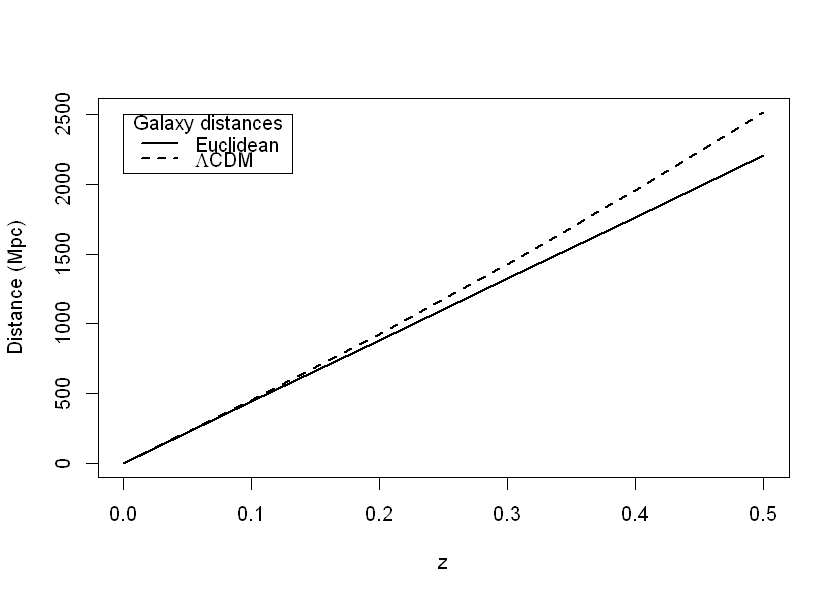

In [17]:
# Plot the results
# The 'plot' function has extensive options to change format; see 'help(par)'

options(jupyter.plot_scale=1)
options(repr.plot.width = 7, repr.plot.height = 5)

plot(z, distGR, type='l', lty=2, lwd=2, ylab='Distance (Mpc)')
lines(z, dist, lty=1, lwd=2)   
legend(0.0, 2500, lty=c(1,2), lwd=c(2,2), title='Galaxy distances', 
     	legend=c('Euclidean', expression(Lambda*CDM)))

> **Exercise 2.** Integrate an astrophysical function.  Estimate the age of the Universe as a function of redshift for a standard $\Lambda$CDM universe model: 
$$ t(z) = H_0^{-1} \int_{z}^{\infty}\frac{dz'}{(1+z')h(z')} $$ 
where $ h(z) = \sqrt{(1-\Omega_{total})(1+z)^2 + \Omega_m(1+z)^3 + \Omega_{\Lambda} } $, $\Omega_m$ is the matter density parameter, and $\Omega_{\Lambda}$ is the dark energy density parameter. Plot the age of the Universe vs. redshift ($z=0$ to 10) for three hypothetical universes: matter-dominated ($\Omega_m=1.0$ and $\Omega_{\Lambda}=0.0$), dark-energy-dominated ($\Omega_m=0.01$ and $\Omega_{\Lambda}=0.99$), and a realistic universe ($\Omega_m=0.31$ and $\Omega_{\Lambda}=0.69$).  This problem and solution is courtesy of graduate student Phoebe Sandhaus, Penn State.

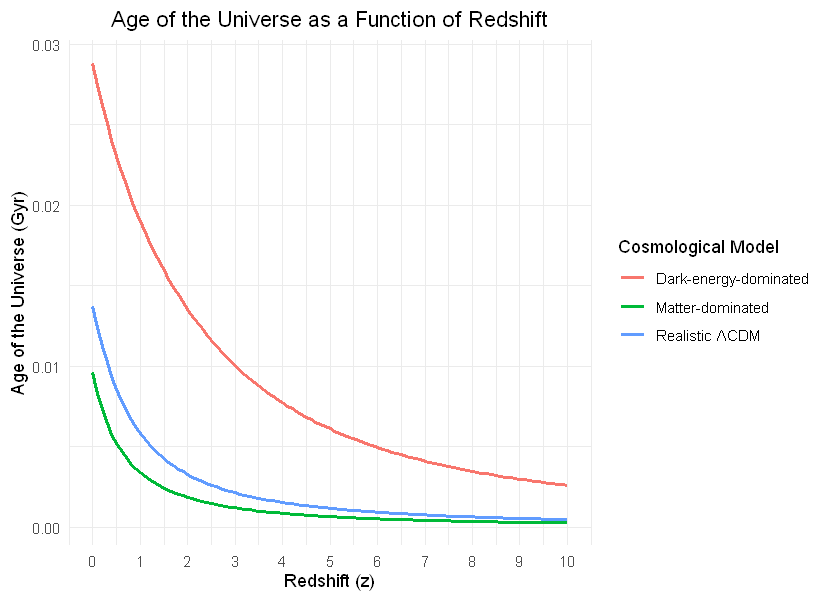

In [25]:
# Exercise 2 soln

library(ggplot2)

H0 = 68 * 1e3 / (3.086e19)

h_z <- function(z, omega_m, omega_lambda){
    omega_total = omega_m + omega_lambda
    return(sqrt((1-omega_total)*(1+z)^2 + omega_m*(1+z)^3 + omega_lambda))
}

integrand <- function(z, omega_m, omega_lambda){
    return(1/((1+z)*h_z(z, omega_m, omega_lambda)))
}

t_z <- function(z, omega_m, omega_lambda){
    return(integrate(integrand, lower = z, upper = 1000, omega_m = omega_m, omega_lambda = omega_lambda)$value / H0)
}

age_of_universe_vec <- Vectorize(t_z, vectorize.args = 'z')

z=seq(0, 10, by=0.1)

models <- list(
  "Matter-dominated" = list(omega_m = 1.0, omega_lambda = 0.0),
  "Dark-energy-dominated" = list(omega_m = 0.01, omega_lambda = 0.99),
  "Realistic ΛCDM" = list(omega_m = 0.31, omega_lambda = 0.69)
)

ages <- lapply(models, function(params){
    age_of_universe_vec(z, params$omega_m, params$omega_lambda)
})

plot_data = data.frame(
    z = rep(z, times = length(models)),
    Age = unlist(ages),
    Model = rep(names(models), each = length(z))
)

plot_data$Age_Gyr = plot_data$Age / (60 * 60 * 24 * 365.25 * 1e9)

ggplot(plot_data, aes(x = z, y = Age_Gyr, color = Model)) +
  geom_line(linewidth = 1) +
  scale_x_continuous(breaks = seq(0, 10, by = 1)) +
  labs(title = "Age of the Universe as a Function of Redshift",
       x = "Redshift (z)",
       y = "Age of the Universe (Gyr)",
       color = "Cosmological Model") +
  theme_minimal() +
  theme(legend.position.inside = c(0.8, 0.8),
        plot.title = element_text(hjust = 0.5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.7575  1.5050  1.5050  2.2525  3.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2424  0.8173  0.9772  1.0224  1.1093  2.4776 

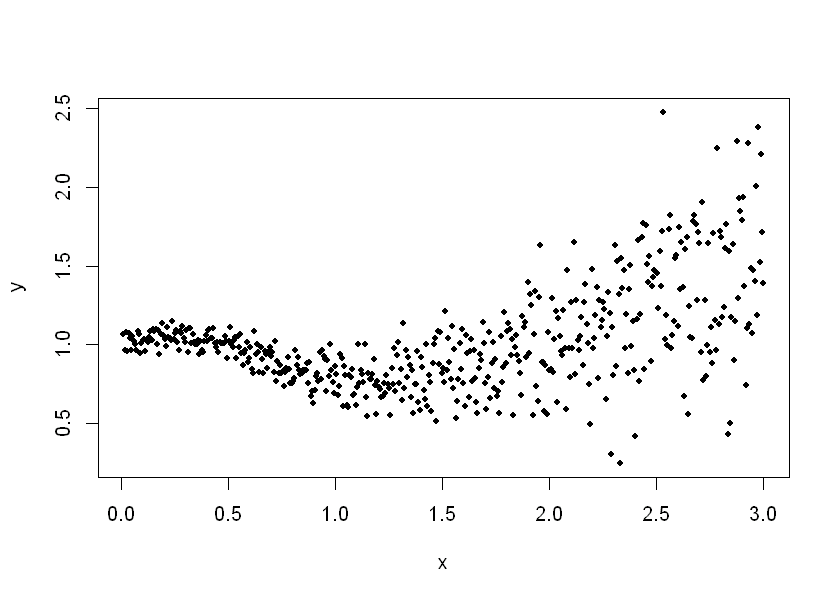

In [26]:
# VI. Examine, summarize and plot univariate distributions: 
# dot plot, box plot, histogram

set.seed(1)
x <- sample(seq(0.01, 3, length.out=500))
y <- 0.5*x + 0.3^(x^2) + rnorm(500, mean=0, sd=(0.05*(1+x^2)))
xy <- cbind(x, y)

plot(xy, pch=20)
summary(x) ; summary(y)   	# Summarizes properties of an R object

pdf 
  2

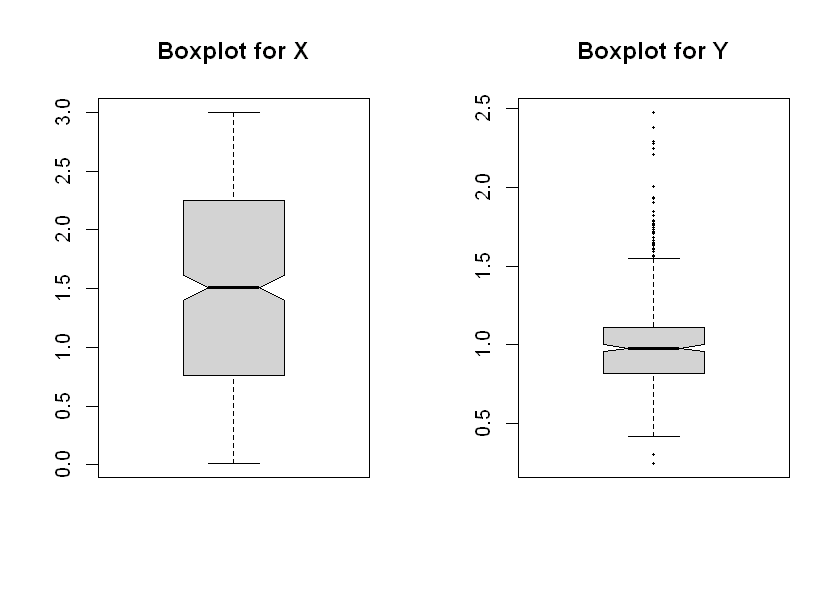

In [27]:
par(mfrow=c(1,2))  		# Set up a two-panel figure
boxplot(x,  notch=T, main='Boxplot for X')
boxplot(y,  notch=T, pch=20, cex=0.5, main='Boxplot for Y')
dev.copy2pdf(file='box.pdf')

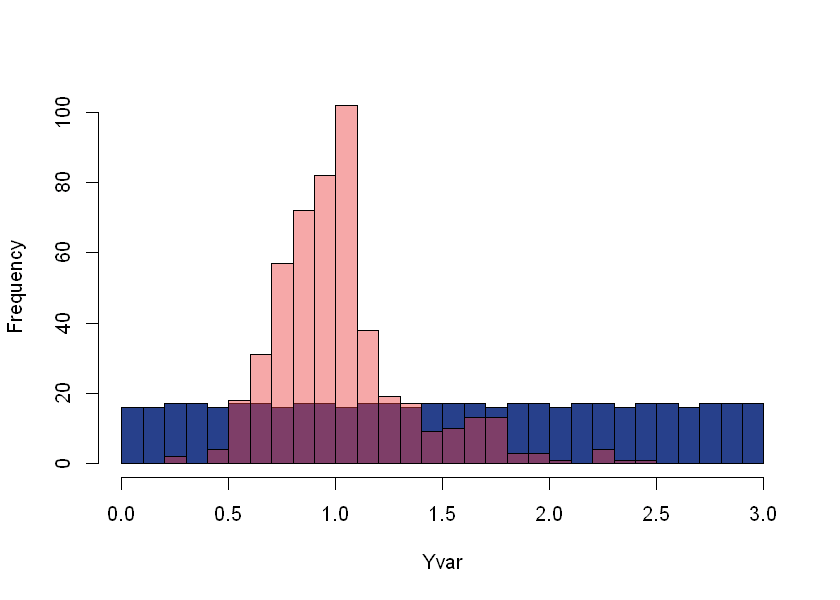

In [28]:
par(mfrow=c(1,1))
hist(x, breaks=30, main='', xlim=range(x), ylim=c(0,100), 
     xlab='Yvar', col='royalblue4')

# add=TRUE suppresses a new plot, and plots on top of the existing one instead
hist(y, breaks=30, main='', xlab='Yvar', 
     col='#ee3b3b70', add=TRUE)

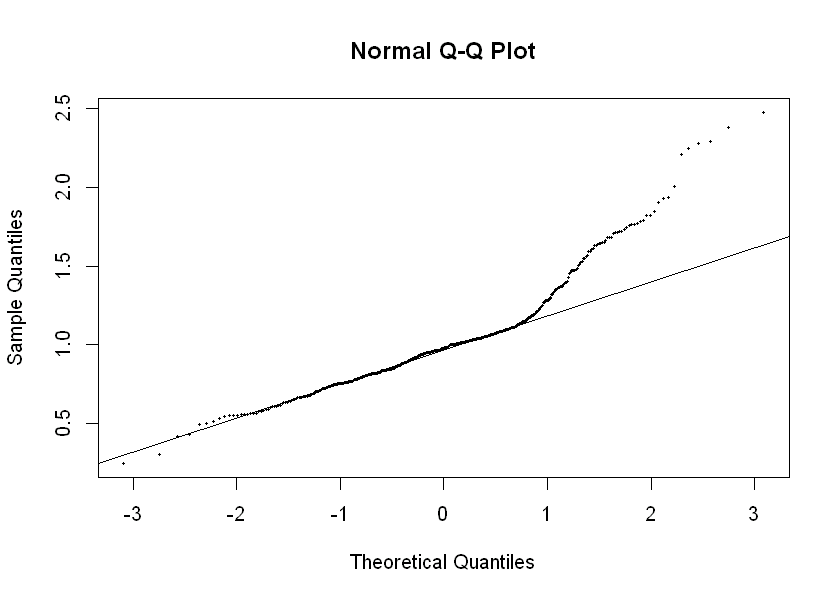

In [29]:
qqnorm(y, pch=20, cex=0.5)  # Quantile function of y compared to normal distribution
qqline(y)					# Expected relationship if y is normal

pdf 
  2

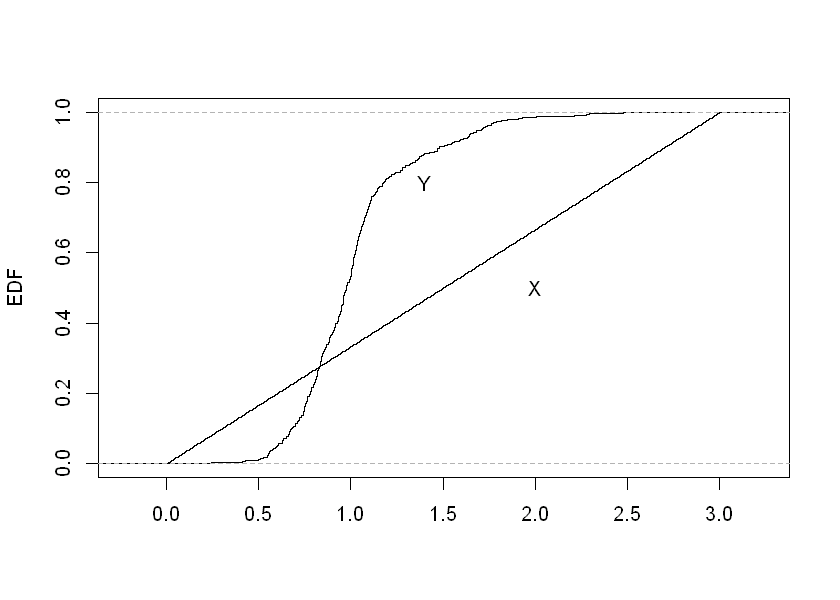

In [30]:
plot(ecdf(x), pch=20, cex=0.0, verticals=TRUE, main='',ylab='EDF',xlab='')  
plot(ecdf(y), pch=20, cex=0.0, verticals=TRUE, add=T)
text(2.0,0.5,"X") ; text(1.4,0.8,"Y")             # text adds annotation within a plot
dev.copy2pdf(file='ecdf.pdf')

In [31]:
# VII. Arrays, data frames and filtering

# Here xy is an `array' of numbers created by `column bind'

xy <- cbind(x, y)  ;  str(xy) 	

# A data.frame associates names to the columns

xy <- as.data.frame(xy)         
names(xy) <- c('Xvar', 'Yvar')

# As with lists, access named columns with $

xy$Xvar[1]

# Collect rows where the first column value exceeds 2
# A lack of index means "all indices". Spaces added here for readability
high_x1 <- xy[xy[ ,1]>2, ]        
high_x2 <- subset(xy, xy[ ,1]>2)	# Another way to extract rows
setequal(high_x1, high_x2)      # test equality of two vectors

 num [1:500, 1:2] 1.945 1.005 0.777 2.509 2.826 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "x" "y"


[1] 1.945411

[1] TRUE

In [32]:
# VIII. Sampling and bootstrapping 

trials <- sample.int(length(xy[,1]),20) # 20 random rows
xy[trials,]	

# 20 bootstrap resamples

trials <- sample.int(length(xy[,1]),20, replace=T) 
xy[trials,]	

# Estimate the standard error of the median of Yvar

median(xy[,2]) 

# Median absolute deviation estimate of median s.e.

mad(xy[,2]) / sqrt(500)	

,Xvar,Yvar
,<dbl>,<dbl>
365,1.3701804,0.7474357
70,0.6271743,0.9346030
64,2.4127856,1.6647248
500,2.7603206,0.8825305
281,2.0892184,0.9773200
42,0.1238477,1.0158780
39,0.6691182,0.9584457
205,2.3229058,1.3180341
225,0.2137275,1.1109325


,Xvar,Yvar
,<dbl>,<dbl>
305,2.9940080,1.7156475
33,2.0412826,1.1690420
95,0.8968136,0.6275851
328,2.5625852,1.8185672
258,1.4720441,0.5118487
71,2.9580561,1.3992631
103,2.0772345,0.5875749
368,1.0166533,0.7309967
450,0.9267735,0.9471256


[1] 0.9771736

[1] 0.01025085

Warning message:
"package 'boot' was built under R version 4.4.3"



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = xy[, 2], statistic = med, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.9771736 -1.271103e-05  0.01299467

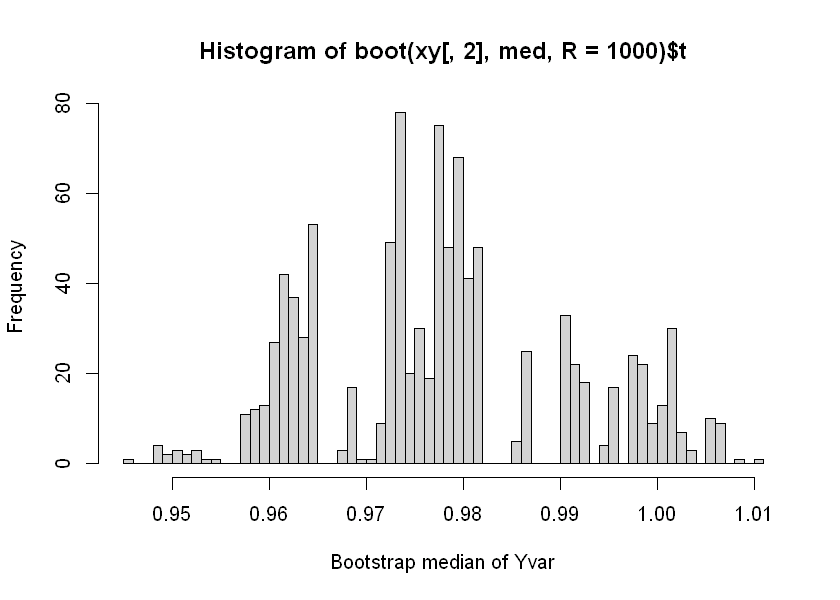

In [33]:
library(boot)  			# The following function in a base-R library
med <- function(x,index) median(x[index])

# Read help(boot) to understand its output list structure

boot(xy[,2], med, R=1000) # Bootstrap estimate of median s.e. 
hist(boot(xy[,2], med, R=1000)$t, breaks=50, 
     xlab='Bootstrap median of Yvar')

> **Exercise 3.**  Bootstrap resampling. Use bootstrap resampling (random sampling with replacement) to estimate uncertainties of a statistic. Create a univariate sample with a weird distribution … maybe sampling from a polynomial or nonlinear function over some interval.  First, calculate the median and a robust measure of its standard error: $1.48*(MAD$ where MAD is the median absolute deviation and the 1.48 scales it to the standard deviation for a Gaussian distribution.   Second, estimate the uncertainty of the median from a bootstrap resampling.  Give the standard error, 95% confidence interval, and plot a histogram of the bootstrap medians.

Sample median: 1.12941 
MAD: 1.560849 
Robust standard error (1.4826*MAD/√n): 0.07305038 

Bootstrap results:
Bootstrap standard error: 0.07379568 
95% Confidence Interval: 1.035358 1.309818 


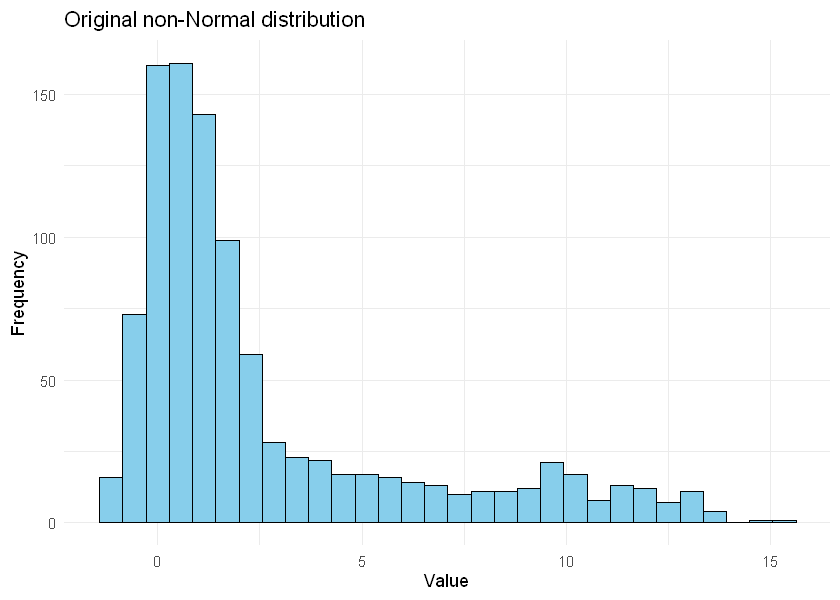

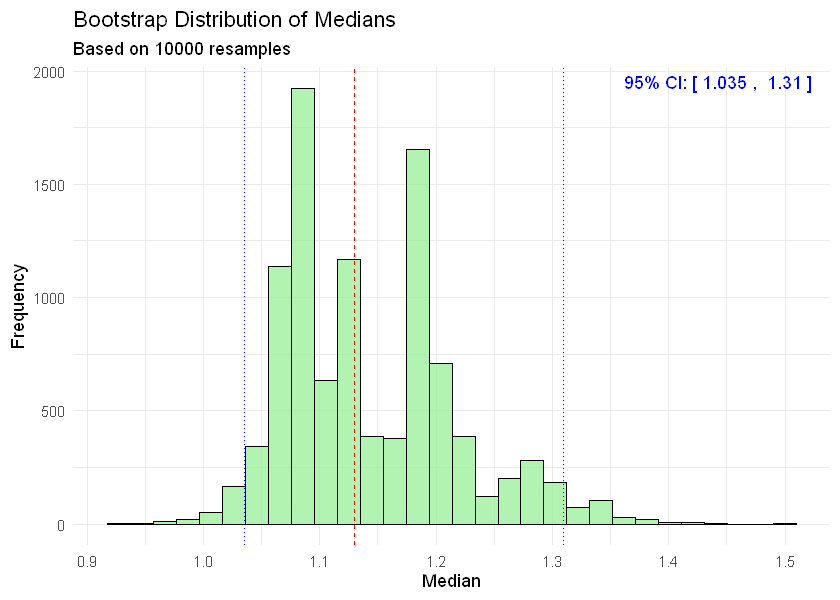

In [42]:
# Exercise 3 soln

library(ggplot2)
library(boot)

set.seed(42)

x <- runif(1000, min=-2, max=2)
y <- 0.5*x^3 + 2*x^2 + x + rnorm(1000, sd = 0.5)

ggplot(data.frame(x,y), aes(y)) + geom_histogram(bins=30, fill="skyblue", color="black") + 
labs(title = "Original non-Normal distribution", x = "Value", y = "Frequency") + theme_minimal()

sample_median <- median(y)
mad_estimate <- mad(y)
robust_se <-  1.48 * mad_estimate / sqrt(length(y))

cat("Sample median:", sample_median, "\n")
cat("MAD:", mad_estimate, "\n")
cat("Robust standard error (1.4826*MAD/√n):", robust_se, "\n")

boot_median <- function(data, indices){
    sample_data <- data[indices]
    return(median(sample_data))
}

boot_results <- boot(y, boot_median, R=10000)

bootstrap_se = sd(boot_results$t) # bootresults standard error
bootstrap_ci = boot.ci(boot_results, type="perc") # 95th percentile CI

cat("\nBootstrap results:\n")
cat("Bootstrap standard error:", bootstrap_se, "\n")
cat("95% Confidence Interval:", bootstrap_ci$percent[4:5], "\n")

bootstrap_medians <- boot_results$t
plot_data <- data.frame(Median = bootstrap_medians)

ggplot(plot_data, aes(x = Median)) +
  geom_histogram(bins = 30, fill = "lightgreen", color = "black", alpha = 0.7) +
  geom_vline(xintercept = sample_median, color = "red", linetype = "dashed") +
  geom_vline(xintercept = bootstrap_ci$percent[4:5], color = "blue", linetype = "dotted") +
  labs(title = "Bootstrap Distribution of Medians",
       subtitle = paste("Based on", length(bootstrap_medians), "resamples"),
       x = "Median", y = "Frequency") +
  annotate("text", x = Inf, y = Inf, 
           label = paste("95% CI: [", round(bootstrap_ci$percent[4], 3), 
                          ", ", round(bootstrap_ci$percent[5], 3), "]"),
           hjust = 1.1, vjust = 1.5, color = "blue") +
  theme_minimal()

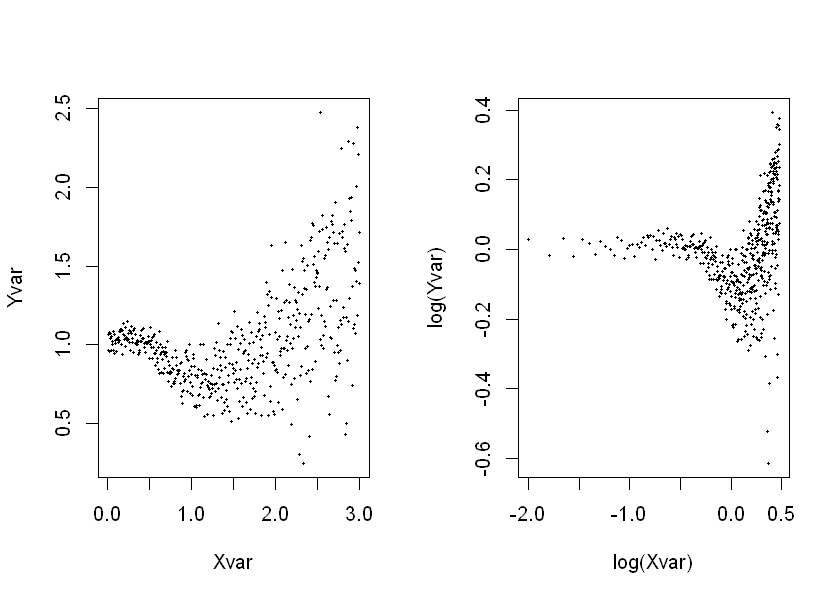

In [34]:
# IX. Bivariate plots and correlation tests

# Scatterplot. See help(points) for symbol shapes.
par(mfrow=c(1,2))
plot(xy, pch=20, cex=0.5)	 
plot(log10(xy), pch=20, cex=0.5, xlab='log(Xvar)', ylab='log(Yvar)')

In [35]:
length(x[x>2])		# State length of a vector.  Use `dim' for an array or data.frame.
# Parametric hypothesis test for bivariate correlation 
cor.test(x[x>2],y[x>2], method='pearson')	
# Nonparametric hypothesis test for bivariate correlation
cor.test(x[x>2],y[x>2], method='kendall')	

[1] 167


	Pearson's product-moment correlation

data:  x[x > 2] and y[x > 2]
t = 5.4633, df = 165, p-value = 1.695e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2546585 0.5127717
sample estimates:
      cor 
0.3913858 



	Kendall's rank correlation tau

data:  x[x > 2] and y[x > 2]
z = 5.1525, p-value = 2.571e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2685953 


# X. R for astronomical data analysis

R was designed in the 1990s for interactive data exploration and analysis by a single user using a single CPU core with a graphics window.  The compiler was not optimized for speed.  However, today R has much improved compilers and considerable ability to use a multi-core environment (including GPUs).  It also was not viewed at a language appropriate for pipeline analysis of large datasets such as those emerging from astronomical satellites or observatories.  This criticism is valid in the sense that it does not have a large and growing software library of specialized code for astronomical data, such as the ~2000 CRAN packages in the _Bioconductor_ toolbox for genomics or the diverse packages in the _astropy_ project in Python.  

However, R can be operated in batch mode, running scripts with the _Rscript_ (or with more flexibility, CRAN package _littler_) command line interface from the operating system prompt.  These commands can be embedded in parallelized scripts for supercomputers using PBS or related scripts.  Using Rscript, we at Penn State have reanalized the full dataset of a major NASA satellite survey (4-year lightcurves for ~150,000 stars observed by Kepler) and ~2 million lightcurves from a ground-based observatory.  The motivation for this approach is that the instrument-specific characteristics of the data reduction had already been performed in Python (Levels 2 and 3  data products), and the data were ready for advanced statistical analysis using CRAN packages.  In our case, sophisticated packages originally designed for econometrics play a central role, along with a Fortran code we wrote for a computationally intensive step.  R code for astronomical pipelines can be remarkably brief if one effectively uses the tens-of-thousands of advanced functions available in CRAN.

The many statistical functionalities of R can also be run directly from Python and several other languages through bi-language interfaces.  R scripts can be embedded in Python using [rpy2](https://pypi.org/project/rpy2/) and, conversely, Python programs can be embedded in R scripts using CRAN package [reticulate](https://cran.r-project.org/web/packages/reticulate/index.html) or several other options.


# XI.  Resources for further study of R

We give here a miscellaneous collection of commands and resources useful for learning more about R as a programming language.  

* There are >700 books with 'R' in the title, most presenting both methodology and code tutorials.  A new book on R is published every ~10 days.  Two are devoted specifically to astronomy:
  * [_Modern Statistical Methods for Astronomy with R Applications_](https://doi.org/10.1017/CBO9781139015653), 2012 E. D. Feigelson & G. J. Babu, Cambridge Univ Press
  * [_Bayesian Models for Astrophysical Data Using R, JAGS, Python, and Stan_](https://doi.org/10.1017/CBO9781316459515), 2018, J. M. Hilbe, R. S. de Souza & E. E. O. Ishida, Cambridge Univ Press

* Two high-quality introductions to R:
  * From the R Core Team: https://cran.r-project.org/doc/manuals/R-intro.html
  * From Carnegie-Mellon University: http://www.stat.cmu.edu/~cshalizi/statcomp/14/

* There are vast informal online learning resources about R programming: 
  *  [R-bloggers](https://www.r-bloggers.com) aggregates entries from ~1100 blogs.  
  * [Stack Overflow] has ~400,000 questions and answers about R programming.
  * CRAN packages are often described in two open-access journals: Journal of Statistical Software and The R Journal.  These articles also appear as _vignettes_ within the R environment.  



In [18]:
# A list of the ~30 important CRAN packages embedded in the base-R environment
library()

# A full list of ~400 functions in R's `base' package
library(help = "base")

# Statistics in base R (~400 functions, tens-of-thousands more in CRAN and elsewhere in R)
library(help='stats')

# List current contents of your session environment
ls()

# Programming utilities including:
#    Use `source' to bring in external R scripts
#    Use `edit' to edit an R object
#    Use 'environment' to segregate a collection of objects
#    Functions `debug', `trace' and `browser' assist with code testing
#    Function 'process.events' allows low-level handling of R commands
library(help = 'utils')

# Loops:  for( i in 1:100) { ... }
# Program flow control:  if/else, ifelse, switch, while, repeat, next, break, stop
foo <- 2
if(foo == 1) cat('Hello world!') else cat('Do nothing')
for(i in 1:10) { cat(' Num = ', i, '\n') }

# Graphics and devices in base R (other packages in CRAN)
library(help='graphics')
library(help='grDevices')

# Parallel computing control in base R 
# CRAN has dozens of other high performance computing packages
library(help='parallel')

# Run an R script residing on disk
help(source)

# Save R objects (or your full environment) onto disk
help(save) ; help(load)

# Save or load history of R commands
help(savehistory)  ;  help(loadhistory)

# Connections, pipes, sockets, URLs, clipboard, compression, etc.
help(connections)
 
# Interact with host computer 
Sys.info()
system('ls -l')
system.time(fft(seq(0,1,length.out=1000000)))	# A million fast Fourier transforms

# Construct composite strings using 'paste'
# Extract postions of a string using `substring'
band_ir <- 'J'
paste('NGC1068',band_ir,'FITS', sep='.')

# FITS format reader/writer
install.packages('FITSio') ; library(FITSio)

# IDL Astro Library translated into R
install.packages('astrolibR') ; library(astrolibR)

# R/CRAN functions are public domain and can be wrapped from Python
# programs using package rpy2.  Example:
### pip install rpy2
### import rpy2
### import rpy2.robjects as robjects
### R = robjects.r
### ranGauss = R.rnorm(100)
### print ranGauss

# Python code can be wrapped into R using CRAN package 'reticulate' (among others)
# R has similar interfaces to many other languages.

[1] "a"            "ang"          "b"            "c"            "dist"        
 [6] "distGR"       "E.H0"         "H_0"          "lum.dist"     "Omega_Lambda"
[11] "Omega_m"      "quadsolver"   "speed.light"  "sqrt_"        "x"           
[16] "y"            "z"

Do nothing Num =  1 
 Num =  2 
 Num =  3 
 Num =  4 
 Num =  5 
 Num =  6 
 Num =  7 
 Num =  8 
 Num =  9 
 Num =  10 


sysname           release           version          nodename 
        "Windows"          "10 x64"     "build 22635" "DESKTOP-TIMEB17" 
          machine             login              user    effective_user 
         "x86-64"    "Time27.B1729"    "Time27.B1729"    "Time27.B1729"

Warning message in system("ls -l"):
"'ls' not found"


[1] 127

   user  system elapsed 
   0.01    0.00    0.14 

[1] "NGC1068.J.FITS"

package 'FITSio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Time27.B1729\AppData\Local\Temp\RtmpqgKWHE\downloaded_packages


Warning message:
"package 'astrolibR' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


ERROR: Error in library(astrolibR): there is no package called 'astrolibR'
